# Kilauea 2018 eruption, data, problem and models

[14.0, 14.0]

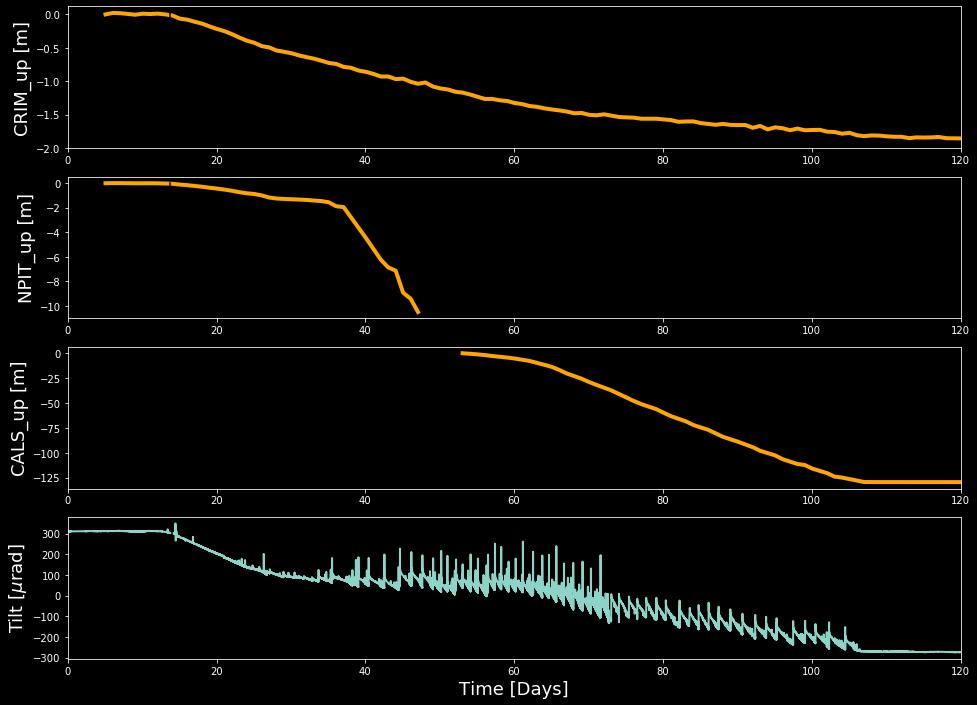

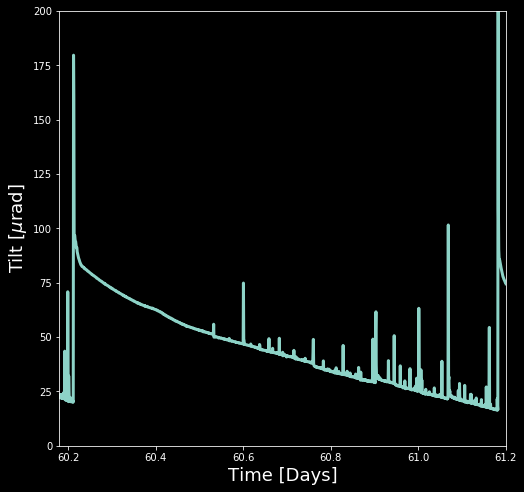

In [5]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
def read_csv(filename):
  
    with open(filename) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        A = []
        for row in readCSV:
            A.append(row)
    return A

def format_gps(A):
    A = A[5:]
    t = []
    d = []
    uz = []
    for i in A:
        t.append(float(i[0]))
        d.append(i[1])
        uz.append(float(i[2])) 
    t = np.array(t)
    uz = np.array(uz)
    return t,d,uz

path_GPS = '/Users/aroman/work/kilauea_2018/GPS/'
path_tilt = '/Users/aroman/work/kilauea_2018/'
gps_list = ['CRIM.csv','NPIT.csv','CALS.csv']
A = np.loadtxt(path_tilt + 'tilt.txt')
time_tilt = A[:,0]
tilt = A[:,6]
tmin = time_tilt[0]
tmax = time_tilt[-1]
mpl.style.use('dark_background')
for gps in gps_list:
    data = read_csv(path_GPS + gps)
    time,date,disp = format_gps(data)
    tmin = np.min([np.min(time),tmin])
counter = 0
fig1, ax1 = plt.subplots(nrows = len(gps_list) + 1, ncols = 1, figsize = (16,12))
 
for gps in gps_list:
    data = read_csv(path_GPS + gps)
    time,date,disp = format_gps(data)
    time = time - tmin
    time = time / (3600 *24)
    tmax = np.max([np.max(time),tmax])
    ax1[counter].plot(time,disp - disp[0],color = 'orange',linewidth = 4)
    ax1[counter].set_ylabel(data[4][2] + ' [m]',fontsize = 18)
    tvline = [13.8,13.8]
    vline = [np.min(disp -disp[0]),np.max(disp -disp[0])]
    ax1[counter].plot(tvline,vline,'k')
    counter = counter + 1

time_tilt = time_tilt - tmin
time_tilt = time_tilt /(3600 *24)
tmax = np.max([np.max(time_tilt),tmax])

ax1[counter].plot(time_tilt,tilt,linewidth = 2)
tvline = [14.,14.]
vline = [np.min(tilt),np.max(tilt)]
ax1[counter].plot(tvline,vline,'k')
ax1[counter].set_ylabel('Tilt [$\mu$rad]',fontsize = 18)
ax1[counter].set_xlabel('Time [Days]',fontsize = 18)
for i in range(len(ax1)):
    ax1[i].set_xlim([0,120])
fig2, ax2 = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
ax2.plot(time_tilt,tilt,linewidth = 3)
ax2.set_xlim([60.18,61.2])
ax2.set_ylim([0,200])
ax2.set_ylabel('Tilt [$\mu$rad]',fontsize = 18)
ax2.set_xlabel('Time [Days]',fontsize = 18)
tvline



9031285.7

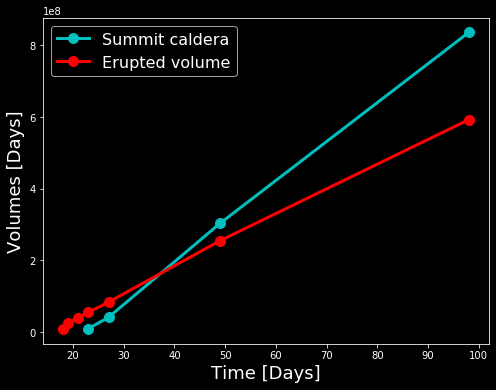

In [8]:
A = np.loadtxt('volumes.txt')
summit = A[0:4,:]
ERZ = A[4:,:]
t_summit = summit[:,0]
vol_summit = summit[:,1]
eb_summit = summit[:,2]
t_ERZ = ERZ[:,0]
vol_ERZ = ERZ[:,1]
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,6))
ax.plot(t_summit,-vol_summit,'co-',markersize = 10,linewidth = 3 )
ax.plot(t_ERZ,vol_ERZ,'ro-',markersize = 10,linewidth = 3 )

ax.legend(['Summit caldera','Erupted volume'],fontsize= 16)
ax.set_xlabel('Time [Days]',fontsize= 18)
ax.set_ylabel('Volumes [Days]',fontsize= 18)
vol_ERZ[0]

The erupted volume is 70% of the caldera collapse. Is the eruoted volume the SAME of the caldera collapse?
## About 1 km$^3$ erupted in 100 days
\begin{equation}
q \sim 100 \,\,m^3s^{-1}
\end{equation}

\begin{equation}
q = \frac{\pi a^4}{8\mu}\frac{\Delta P}{l}
\end{equation}
With $\mu\sim 100$ Pa s and $l \sim 40$ km


In [4]:

import numpy as np
import matplotlib.pyplot as plt
pi = 3.14

a = np.linspace(2.5,5)
S = pi * a**2 
ar = np.linspace(10,100,4)
mu1 = 1e+2
mu2 = 5e+2
l = 3e+4
q = 1e+2
P1 = q * 8 * mu1 * l * pi/ (S**2)/1e+6
P2 = q * 8 * mu2 * l * pi/ (S**2)/1e+6
y_litho1 = 1.51e+7e+7
y_litho
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7))
x_litho = (q * 8 * mu * l /(3.14 * y_litho))**0.25
ax.fill_between(a,P1,P2)
ax.plot(x_litho,y_litho/1e+6,'r',linewidth = 7)
ax.set_xlabel('Conduit radius [m]',fontsize= 18)
ax.set_ylabel('$\Delta P$ [MPa]',fontsize= 18)

alpha = 1e-2
b = (S /pi * alpha) ** 0.5
a = b / alpha
P = q * 4 * mu * l /(pi * a* b**3)
#ax[1].semilogy(S,P/1e+6,'r',linewidth = 4)



SyntaxError: invalid syntax (<ipython-input-4-04a8dde728d8>, line 14)

# Piston model with time dependent pressure and displacement
System of three differential equations
\begin{equation}
\frac{dx}{dt} = v
\end{equation}

\begin{equation}
m\frac{dv}{dt} = mg - F_d- pS
\end{equation}

\begin{equation}
\frac{dp}{dt} = \frac{kS}{V}v - \frac{k \pi a^4}{8 V\mu l}p
\end{equation}
The equations are scalded by:

\begin{equation}
x^* = \frac{(mg - F_d)}{kS^2}V_0
\end{equation}


\begin{equation}
t^* = \bigg(\frac{mV_0}{kS^2}\bigg) ^{1/2}
\end{equation}

\begin{equation}
p^* = \frac{(mg - F_d)}{S}
\end{equation}


\begin{equation}
v^* = \frac{(mg - F_d)}{S}\bigg(\frac{V_0}{km}\bigg) ^{1/2}
\end{equation}



The two governing system of equation than becomes
\begin{equation}
\frac{dx}{dt} = v
\end{equation}


\begin{equation}
\frac{dv}{dt} = 1 - p
\end{equation}

\begin{equation}
\frac{dp}{dt} = v - R_1 p
\end{equation}

With $R_1$ being 
\begin{equation}
R_1 = \frac{\pi a^4}{8 \mu l S}\bigg(\frac{km}{V_0}\bigg) ^{1/2}
\end{equation}


In [20]:
2000*9.8*800


15680000.0

We look for periodic solutions, so we look for complex roots of the characteristic equation and set $R_1^2 - 4 < 0$ in both the eigenvector and eigen value

Subject to initial conditions,
\begin{equation}
x(0) = \frac{(mg - F_s)}{S^2}\frac{V_0}{k}-\frac{p0}{S}\frac{V_0}{k}
\end{equation}

\begin{equation}
v(0) = 0
\end{equation}

\begin{equation}
p(0) = \frac{(mg - F_s)}{S}
\end{equation}
The scaled version of the last is
\begin{equation}
p(0) = R_2
\end{equation}
With
\begin{equation}
R_2 = \frac{mg -F_s}{mg - F_d}
\end{equation}
and 
\begin{equation}
x(0) = R_2 - R_3
\end{equation}
With
\begin{equation}
R_3 = \frac{p_0 S}{(mg - F_d)}
\end{equation}



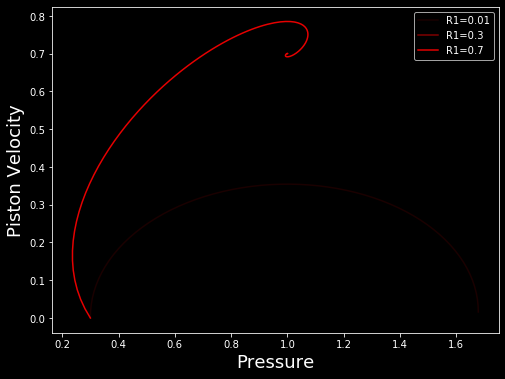

In [4]:
from numpy import *
import matplotlib.pyplot as plt

fig1, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,6))

r1 = [1e-2,3e-1,7e-1]
r2 = [0.3]
r = linspace(0.1,0.9,len(r1))
t = np.linspace(0,100,1000)

counter = 0
for R1 in r1:
    for R2 in r2:
        k = sqrt(4-R1**2)/2
        v = R1 - R1*(R2 + 1)*(R1*sin(k*t/2) + k*cos(k*t/2))*exp(-R1*t/2)/(2*k) + (R2 - 1)*(R1*cos(k*t/2) - k*sin(k*t/2))*exp(-R1*t/2)/2
        p = -R1*(R2 + 1)*exp(-R1*t/2)*sin(k*t/2)/k + (R2 - 1)*exp(-R1*t/2)*cos(k*t/2) + 1
        if any(v<0):
            v[where(v<0)[0][0]:] = NaN
        ax.plot(p,v,color =(r[counter],0,0) )
        counter = counter + 1
ax.set_xlabel('Pressure',fontsize = 18)
ax.set_ylabel('Piston Velocity',fontsize = 18)
ax.legend(['R1='+str(r1[0]),'R1='+str(r1[1]),'R1='+str(r1[2])])



# Slip phase
### We can simplify the system considering that $R_1<<1$
I this case we get that
\begin{equation}
v(t)= (1 - R_2) \sin t
\end{equation}
and that 
\begin{equation}
p(t)= (R_2 - 1) \cos t + 1
\end{equation}

In [ ]:
t = linspace(0,3.14)
R1 = 1e-2
R2 = 0.4
R3 = 0.5
k = sqrt(4-R1**2)/2
fig1, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (10,12))
v1 = R1 - R1*(R2 + 1)*(R1*sin(k*t)/2 + k*cos(k*t))*exp(-R1*t/2)/(2*k) + (R2 - 1)*(R1*cos(k*t)/2 - k*sin(k*t))*exp(-R1*t/2)
v2 =(1- R2)* sin(t) 
ax[0].plot(t,v1,'g')
ax[0].plot(t,v2,'b')
ax[0].set_ylabel('Piston Velocity',fontsize = 18)

p1 = -R1*(R2 + 1)*exp(-R1*t/2)*sin(k*t)/(2*k) + (R2 - 1)*exp(-R1*t/2)*cos(k*t) + 1
p2 = (R2 - 1) * cos(t) + 1
ax[1].plot(t,p1,'g')
ax[1].plot(t,p2,'b')
ax[1].set_xlabel('Time',fontsize = 18)
ax[1].set_ylabel('Pressure',fontsize = 18)
ax[0].legend(['Full system', 'Approximation'],fontsize = 14)
ax[1].legend(['Full system', 'Approximation'],fontsize = 14)


# Stick phase
When the velocity goes to zero the piston stick, and at this point the pressure evolution is given by


\begin{equation}
p(t) = (2-R2)\exp[-R_1(t - t_0)]
\end{equation}

Text(0, 0.5, 'Pressure')

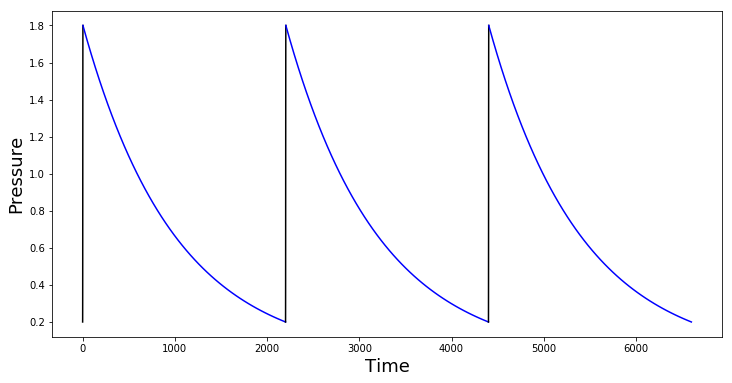

In [134]:
R2 = 0.2
R1= 1e-3
N = 3
t0 = 0 
fig1, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12,6))

for i in range(0,N):
    t_slip =  linspace(t0,t0 + 3.14)
    p_slip = (R2 - 1) * cos(t_slip-t0) + 1
    t_stick = linspace(t0 + 3.14,t0 + 3.14 - 1/R1*log(R2/(2-R2)))
    p_stick = (2 - R2)*exp(-R1*(t_stick- (t0 + 3.14)))
    ax.plot(t_slip,p_slip,'k')
    ax.plot(t_stick,p_stick,'b')
    t0 = t_stick[-1]
    
ax.set_xlabel('Time',fontsize = 18)
ax.set_ylabel('Pressure',fontsize = 18)


Text(0, 0.5, 'Pressure')

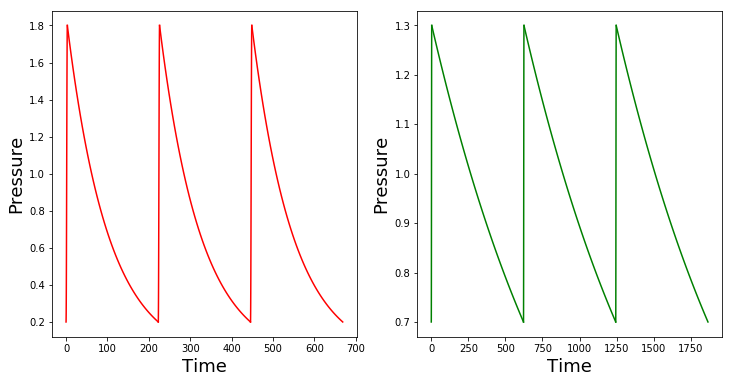

In [135]:
fig1, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))
R2 = 0.2
R1= 1e-2
N = 3
t0 = 0 
for i in range(0,N):
    t_slip =  linspace(t0,t0 + 3.14)
    p_slip = (R2 - 1) * cos(t_slip-t0) + 1
    t_stick = linspace(t0 + 3.14,t0 + 3.14 - 1/R1*log(R2/(2-R2)))
    p_stick = (2 - R2)*exp(-R1*(t_stick- (t0 + 3.14)))
    ax[0].plot(t_slip,p_slip,'r')
    ax[0].plot(t_stick,p_stick,'r')
    t0 = t_stick[-1]
    
ax[0].set_xlabel('Time',fontsize = 18)
ax[0].set_ylabel('Pressure',fontsize = 18)
R2 = 0.7
R1= 1e-3
N = 3
t0 = 0 

for i in range(0,N):
    t_slip =  linspace(t0,t0 + 3.14)
    p_slip = (R2 - 1) * cos(t_slip-t0) + 1
    t_stick = linspace(t0 + 3.14,t0 + 3.14 - 1/R1*log(R2/(2-R2)))
    p_stick = (2 - R2)*exp(-R1*(t_stick- (t0 + 3.14)))
    ax[1].plot(t_slip,p_slip,'g')
    ax[1].plot(t_stick,p_stick,'g')
    t0 = t_stick[-1]
    
ax[1].set_xlabel('Time',fontsize = 18)
ax[1].set_ylabel('Pressure',fontsize = 18)

In [13]:
time_tilt[:10]*3600*24

array([  0.,  60., 120., 180., 240., 300., 360., 420., 480., 540.])

In [14]:
len(time_tilt)

175309